## 1. Install Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from bs4 import BeautifulSoup # To scrap data from Wikipedia

import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## 2. Scrap Bahrain Cities/Town Data from Wikipedia

In [2]:
url = 'https://en.wikipedia.org/wiki/Category:Populated_places_in_Bahrain'
html_doc = requests.get(url).text # Get HTML Doc
# pprint(html_doc)
soup = BeautifulSoup(html_doc, 'html.parser') # Parse using bs4
blocks = soup.find_all("div", {"class": "mw-category-group"})[1:]

bh_data=[]
for block in blocks:
    places = block.find('ul').find_all('li')
    for place in places:
        bh_data.append(place.a.text.split(',')[0])

bh_data = pd.DataFrame(bh_data, columns=['Area'])
remove_places = ['Rifa and Southern Region', 'Northern City']
bh_data = bh_data[bh_data['Area'].apply(lambda item : item not in remove_places)].reset_index(drop=True)
bh_data

,Area
0,A'ali
1,Abu Baham
2,Abu Saiba
3,Al Garrya
4,Al Hajar
5,Al Kharijiya
6,Al Markh
7,Al Musalla
8,Al Qadam
9,Al Qala


## Retrieve Coordinates via a Geocoder

In [3]:
import os
apikey = "0F8YmbPnKYoRCXi1eDHU5q2RZJZwMEXy"
import geocoder

lats = []
lngs = []
for city in bh_data['Area']:
    
    
    geocoder_type = 'osm'
    try:
        g = geocoder.osm(f"{city}, Bahrain", key=apikey)
        geodata = g.json
        lats.append(geodata['lat'])
    except:
        geocoder_type = 'MAPQUEST'
        g = geocoder.mapquest(f"{city}, Bahrain", key=apikey)
        geodata = g.json
        lats.append(geodata['lat'])
    lngs.append(geodata['lng'])
    print(city, "|", geocoder_type)
bh_data['Latitude'] = lats
bh_data['Longitude'] = lngs
bh_data.head()

A'ali | osm
Abu Baham | osm
Abu Saiba | osm
Al Garrya | osm
Al Hajar | osm
Al Kharijiya | MAPQUEST
Al Markh | osm
Al Musalla | osm
Al Qadam | osm
Al Qala | osm
Al Qurayyah | osm
Amwaj Islands | osm
Arad | osm
Askar | osm
Awali | osm
Budaiya | osm
Jid Ali | osm
Bahrain Bay | osm
Bani Jamra | MAPQUEST
Barbar | osm
Bilad Al Qadeem | osm
Bu Quwah | osm
Buri | osm
Busaiteen | osm
Al Daih | osm
Al Dair | osm
Dar Kulaib | osm
Diplomatic Area | osm
Diraz | osm
Diyar Al Muharraq | osm
Dumistan | MAPQUEST
Durrat Al Bahrain | osm
East Hidd City | osm
Eker | osm
Galali | osm
Al Hidd | osm
Halat Bu Maher | osm
Halat Nuaim | MAPQUEST
Hamad Town | osm
Hamala | osm
Hawar Islands | osm
Hillat Abdul Saleh | MAPQUEST
Isa Town | osm
Janabiyah | osm
Jannusan | osm
Jasra | osm
Jaww | osm
Jid Al-Haj | osm
Jidhafs | osm
Jurdab | MAPQUEST
Karbabad | osm
Karrana | MAPQUEST
Karzakan | osm
Khamis | osm
Ma'ameer | osm
Mahazza | MAPQUEST
Malkiya | osm
Manama | osm
Marquban | MAPQUEST
Muharraq | osm
Muqaba | MAPQUES

,Area,Latitude,Longitude
0,A'ali,26.154454,50.527364
1,Abu Baham,26.205737,50.541668
2,Abu Saiba,30.325299,48.266157
3,Al Garrya,20.639623,-100.477387
4,Al Hajar,26.225405,50.590138


In [4]:
# Store coordinates as CSV
bh_data.to_csv("bahrain-locations.csv", index=False)

In [5]:
# Load Coorindates Data
bh_data = pd.read_csv("bahrain-locations.csv")

In [4]:
radius = 500
# print()
lat, lng = bh_df[['Latitude', 'Longitude']].iloc[4].values
print(lat, lng)

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, ACCESS_TOKEN, VERSION, radius, LIMIT)
results = requests.get(url).json()
results  

NameError: name 'bh_df' is not defined

In [6]:
CLIENT_ID = 'E2JUP5WXPZY2VW0OPOM152ASPJG5SQVZZ5XE2UPJOOQRK2RZ' # My Foursquare ID
CLIENT_SECRET = '22IZUTH0E2YSG5W5H5Z3NKKP420THVRUS3YLZBBMNBQUKLFF' # My Foursquare Secret
ACCESS_TOKEN = '4YXG21MFRBI4KQYZ05E1N0DHLHPGTQ2HVUAQ1T1JC5OHIWSL' # My FourSquare Access Token
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: E2JUP5WXPZY2VW0OPOM152ASPJG5SQVZZ5XE2UPJOOQRK2RZ
CLIENT_SECRET:22IZUTH0E2YSG5W5H5Z3NKKP420THVRUS3YLZBBMNBQUKLFF


In [209]:
df.head()

,Cities
0,Manama
1,Riffa
2,Al-Muharraq
3,Madinat Hamad
4,A'ali


## 3. Get the coordinates for each neigborhood

In [4]:
postal_coords = pd.read_csv("toronto_postal_coordinates.csv")
postal_coords.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [5]:
toronto_df = pd.merge(df, postal_coords) # Merge them
toronto_df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


We will use **Folium** visualize the map of Toronto along with each neigborhood as points on the map

In [8]:
# create map of Toronto using latitude and longitude values
latitude, longitude = 25.9406805, 50.3073847

map_bahrain = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, city in zip(bh_data['Latitude'], bh_data['Longitude'],
                                           bh_data['Area']):
    
    label = folium.Popup(city, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bahrain)  
    
map_bahrain

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name.

In [8]:
toronto_df.loc[0, 'Neighborhood']

'Parkwoods'

In [10]:
latitude, longitude = 26.2136715,50.5783592

# neighborhood_name = toronto_df.loc[0, 'Neighborhood'] # neighborhood name

# print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
#                                                                neighborhood_latitude, 
#                                                                neighborhood_longitude))

Get the coordinates

Next we extract the category of each venue

In [8]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

NameError: name 'results' is not defined

And how many venues were returned by Foursquare?

In [212]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

7 venues were returned by Foursquare.


## 4. Explore all neighborhoods in Toronto

In [9]:
# Get the name of Borough
print(f"We will explore {bh_data.shape[0]} areas in Bahrain")


We will explore 82 areas in Bahrain


#### Let's create a function to repeat the same process to all the neighborhoods in Toronto


In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
#         print(1)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
                
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called _toronto_venues_.

In [12]:
# type your answer here
bh_venues = getNearbyVenues(bh_data['Area'], bh_data['Latitude'], 
                                   bh_data['Longitude'], 500)
bh_venues.shape

A'ali
Abu Baham
Abu Saiba
Al Garrya
Al Hajar
Al Kharijiya
Al Markh
Al Musalla
Al Qadam
Al Qala
Al Qurayyah
Amwaj Islands
Arad
Askar
Awali
Budaiya
Jid Ali
Bahrain Bay
Bani Jamra
Barbar
Bilad Al Qadeem
Bu Quwah
Buri
Busaiteen
Al Daih
Al Dair
Dar Kulaib
Diplomatic Area
Diraz
Diyar Al Muharraq
Dumistan
Durrat Al Bahrain
East Hidd City
Eker
Galali
Al Hidd
Halat Bu Maher
Halat Nuaim
Hamad Town
Hamala
Hawar Islands
Hillat Abdul Saleh
Isa Town
Janabiyah
Jannusan
Jasra
Jaww
Jid Al-Haj
Jidhafs
Jurdab
Karbabad
Karrana
Karzakan
Khamis
Ma'ameer
Mahazza
Malkiya
Manama
Marquban
Muharraq
Muqaba
Muqsha
Nabih Saleh
Nurana Islands
Nuwaidrat
Riffa
Reef Island
Sadad
Sakhir
Salmabad
Samaheej
Sanad
Sar
Sehla
Shahrakan
Shakhura
Sitra
Sufala
Tashan
Tubli
Umm an Nasan
Zallaq


(847, 7)

In [13]:
print(f"There are {bh_venues.shape[0]} venues explored by Foursquare in Bahrain")

There are 847 venues explored by Foursquare in Bahrain


Let's check how many venues were returned for each neighborhood


In [14]:
bh_venues.groupby('Area').count()

,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Area,,,,,,
A'ali,6,6,6,6,6,6
Abu Baham,4,4,4,4,4,4
Al Daih,17,17,17,17,17,17
Al Dair,5,5,5,5,5,5
Al Garrya,6,6,6,6,6,6
Al Hajar,18,18,18,18,18,18
Al Hidd,7,7,7,7,7,7
Al Kharijiya,3,3,3,3,3,3
Al Markh,4,4,4,4,4,4


#### Let's find out how many unique categories can be curated from all the returned venues

In [15]:
print('There are {} uniques categories.'.format(len(bh_venues['Venue Category'].unique())))

There are 153 uniques categories.


## 5. Analyze each neighborhood

In [16]:
# one hot encoding
bh_onehot = pd.get_dummies(bh_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bh_onehot = pd.concat([bh_venues[['Area']], bh_onehot], axis=1) 

bh_onehot.head()

,Area,American Restaurant,Arcade,Arepa Restaurant,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Bathing Area,Bay,Beach,Beach Bar,Beer Garden,Board Shop,Bookstore,Boutique,Breakfast Spot,Buffet,Burger Joint,Cafeteria,Café,Canal,Candy Store,Chinese Restaurant,City,Clothing Store,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Electronics Store,Farm,Farmers Market,Fast Food Restaurant,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Historic Site,Hobby Shop,Hookah Bar,Hot Dog Joint,Hotel,Hotel Pool,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Lounge,Market,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Music Store,Nightlife Spot,Office,Paper / Office Supplies Store,Park,Pastry Shop,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pizza Place,Playground,Plaza,Pool,Racetrack,Recreation Center,Rental Car Location,Resort,Restaurant,Rock Club,Roof Deck,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shabu-Shabu Restaurant,Shawarma Place,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soccer Field,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Track,Trail,Turkish Restaurant,Vape Store,Village,Volleyball Court,Wings Joint,Women's Store,Yoga Studio
0,A'ali,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,A'ali,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,A'ali,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,A'ali,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,A'ali,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.


In [17]:
bh_onehot.shape

(847, 154)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [18]:
bh_grouped = bh_onehot.groupby(['Area']).mean().reset_index()
bh_grouped.head()

,Area,American Restaurant,Arcade,Arepa Restaurant,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Bathing Area,Bay,Beach,Beach Bar,Beer Garden,Board Shop,Bookstore,Boutique,Breakfast Spot,Buffet,Burger Joint,Cafeteria,Café,Canal,Candy Store,Chinese Restaurant,City,Clothing Store,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Electronics Store,Farm,Farmers Market,Fast Food Restaurant,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Historic Site,Hobby Shop,Hookah Bar,Hot Dog Joint,Hotel,Hotel Pool,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Lounge,Market,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Music Store,Nightlife Spot,Office,Paper / Office Supplies Store,Park,Pastry Shop,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pizza Place,Playground,Plaza,Pool,Racetrack,Recreation Center,Rental Car Location,Resort,Restaurant,Rock Club,Roof Deck,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shabu-Shabu Restaurant,Shawarma Place,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soccer Field,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Track,Trail,Turkish Restaurant,Vape Store,Village,Volleyball Court,Wings Joint,Women's Store,Yoga Studio
0,A'ali,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.166667,0.0,0.0,0.166667,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.166667,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Abu Baham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Al Daih,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176471,0.0,0.058824,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.058824,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.294118,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

#### Let's confirm the new size


In [19]:
bh_grouped.shape

(73, 154)

#### Let's print each neighborhood along with the top 10 most common venues


In [20]:
# Function to sort venues by most common ones
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Area'] = bh_grouped['Area']

for ind in np.arange(bh_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bh_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A'ali,Shopping Mall,Sports Club,Convenience Store,Middle Eastern Restaurant,Coffee Shop,Pastry Shop,Persian Restaurant,Pet Store,Pharmacy,Photography Studio
1,Abu Baham,Furniture / Home Store,Middle Eastern Restaurant,Moving Target,Office,Park,Pastry Shop,Persian Restaurant,Pet Store,Pharmacy,Photography Studio
2,Al Daih,Middle Eastern Restaurant,Café,Jewelry Store,Persian Restaurant,Farmers Market,Candy Store,Food & Drink Shop,Dessert Shop,Pharmacy,Hookah Bar
3,Al Dair,Lounge,Volleyball Court,Supermarket,BBQ Joint,Bakery,American Restaurant,Pie Shop,Park,Pastry Shop,Persian Restaurant
4,Al Garrya,Convenience Store,Taco Place,BBQ Joint,Food Stand,Mexican Restaurant,Pier,Pastry Shop,Persian Restaurant,Pet Store,Pharmacy


## 6. Cluster Neighborhoods


Run _k_-means to cluster the neighborhood into 5 clusters.


In [74]:

# set number of clusters
kclusters = 25

bh_grouped_clustering = bh_grouped.drop('Area', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bh_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([ 1, 15, 17,  1, 20,  1, 13, 16,  5,  1], dtype=int32)

In [38]:
kmeans.inertia_

10.828218097494853

Picking the best value of `kclusters`

In [68]:

k_range = range(2,65)
losses = []
for k in k_range:

    # run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(bh_grouped_clustering)
    losses.append(kmeans.inertia_)



In [69]:
kVSloss = list(zip(k_range, losses))

kVSloss.sort(key=lambda x : x[1], reverse=False)
kVSloss[0]


(64, 0.011135426990387432)

<AxesSubplot:>

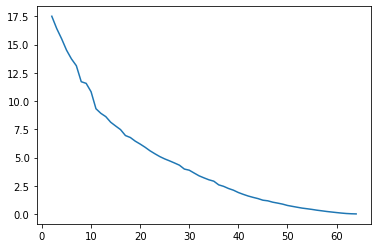

In [73]:
import seaborn as sns
sns.lineplot(x=k_range, y=losses)
# plt.show()

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [75]:
# add clustering labels
try:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
except:
    # Allows me to retry if the Cluster Labels column exists
    neighborhoods_venues_sorted['Cluster Labels'] = kmeans.labels_

bh_merged = bh_data

# merge bh_grouped with bh_data to add latitude/longitude for each neighborhood
bh_merged = bh_merged.join(neighborhoods_venues_sorted.set_index('Area'), on='Area')
bh_merged.dropna(how='any', axis=0, inplace=True)
bh_merged['Cluster Labels'] = bh_merged['Cluster Labels'].astype(np.int32)
bh_merged.head() # check the last columns!

,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A'ali,26.154454,50.527364,1,Shopping Mall,Sports Club,Convenience Store,Middle Eastern Restaurant,Coffee Shop,Pastry Shop,Persian Restaurant,Pet Store,Pharmacy,Photography Studio
1,Abu Baham,26.205737,50.541668,15,Furniture / Home Store,Middle Eastern Restaurant,Moving Target,Office,Park,Pastry Shop,Persian Restaurant,Pet Store,Pharmacy,Photography Studio
3,Al Garrya,20.639623,-100.477387,20,Convenience Store,Taco Place,BBQ Joint,Food Stand,Mexican Restaurant,Pier,Pastry Shop,Persian Restaurant,Pet Store,Pharmacy
4,Al Hajar,26.225405,50.590138,1,Fast Food Restaurant,Restaurant,Turkish Restaurant,Café,Hookah Bar,Department Store,Hotel,Thai Restaurant,Furniture / Home Store,Coffee Shop
5,Al Kharijiya,26.160230,50.609140,16,Arcade,Dog Run,Board Shop,American Restaurant,Pie Shop,Park,Pastry Shop,Persian Restaurant,Pet Store,Pharmacy


Finally, let's visualize the resulting clusters


In [76]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bh_merged['Latitude'], bh_merged['Longitude'], bh_merged['Area'], bh_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 7. Examine Clusters


Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster.


#### Cluster 1


In [30]:
bh_merged.loc[bh_merged['Cluster Labels'] == 0, bh_merged.columns[[0] + list(range(4, bh_merged.shape[1]))]]

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Arad,Burger Joint,Juice Bar,Café,Diner,Tea Room,American Restaurant,Photography Studio,Park,Pastry Shop,Persian Restaurant
13,Askar,Café,Flower Shop,Pool,Beach,Burger Joint,American Restaurant,Photography Studio,Pastry Shop,Persian Restaurant,Pet Store
41,Hillat Abdul Saleh,Breakfast Spot,Restaurant,Rental Car Location,Recreation Center,Office,Paper / Office Supplies Store,Park,Pastry Shop,Persian Restaurant,Pet Store
51,Karrana,Restaurant,Women's Store,Pie Shop,Paper / Office Supplies Store,Park,Pastry Shop,Persian Restaurant,Pet Store,Pharmacy,Photography Studio
64,Nuwaidrat,Restaurant,Café,Asian Restaurant,Pool,Pie Shop,Park,Pastry Shop,Persian Restaurant,Pet Store,Pharmacy


#### Cluster 2


In [31]:
bh_merged.loc[bh_merged['Cluster Labels'] == 1, bh_merged.columns[[0] + list(range(4, bh_merged.shape[1]))]]

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A'ali,Shopping Mall,Sports Club,Convenience Store,Middle Eastern Restaurant,Coffee Shop,Pastry Shop,Persian Restaurant,Pet Store,Pharmacy,Photography Studio
3,Al Garrya,Convenience Store,Taco Place,BBQ Joint,Food Stand,Mexican Restaurant,Pier,Pastry Shop,Persian Restaurant,Pet Store,Pharmacy
4,Al Hajar,Fast Food Restaurant,Restaurant,Turkish Restaurant,Café,Hookah Bar,Department Store,Hotel,Thai Restaurant,Furniture / Home Store,Coffee Shop
5,Al Kharijiya,Arcade,Dog Run,Board Shop,American Restaurant,Pie Shop,Park,Pastry Shop,Persian Restaurant,Pet Store,Pharmacy
6,Al Markh,Café,Turkish Restaurant,Hotel,Mobile Phone Shop,American Restaurant,Photography Studio,Park,Pastry Shop,Persian Restaurant,Pet Store
7,Al Musalla,Restaurant,Historic Site,Food Court,Hotel,Middle Eastern Restaurant,Coffee Shop,Pastry Shop,Persian Restaurant,Pet Store,Pharmacy
9,Al Qala,Café,Burger Joint,Coffee Shop,Sandwich Place,Restaurant,Movie Theater,Massage Studio,Diner,Pizza Place,Snack Place
11,Amwaj Islands,Hotel,Convenience Store,Soccer Field,Market,Grocery Store,Playground,Pier,Photography Studio,Pastry Shop,Persian Restaurant
15,Budaiya,Middle Eastern Restaurant,Park,Kebab Restaurant,Farmers Market,Fast Food Restaurant,Cafeteria,Burger Joint,Miscellaneous Shop,Restaurant,Mexican Restaurant
16,Jid Ali,Middle Eastern Restaurant,Coffee Shop,Breakfast Spot,Café,Asian Restaurant,Shopping Mall,American Restaurant,Pet Store,Spa,Gym / Fitness Center


#### Cluster 3


In [31]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[2] + list(range(6, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Caledonia-Fairbanks,Park,Women's Store,Pool,Accessories Store,Mexican Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop
35,The Danforth East,Park,Convenience Store,Accessories Store,Middle Eastern Restaurant,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop
40,Downsview East,Airport,Park,Middle Eastern Restaurant,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Accessories Store
52,"Willowdale, Newtonbrook",Park,Accessories Store,Mexican Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Middle Eastern Restaurant,Metro Station
64,Weston,Park,Convenience Store,Accessories Store,Middle Eastern Restaurant,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop
66,York Mills West,Construction & Landscaping,Convenience Store,Bar,Park,Accessories Store,Miscellaneous Shop,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant
83,"Moore Park, Summerhill East",Park,Accessories Store,Mexican Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Middle Eastern Restaurant,Metro Station


#### Cluster 4


In [32]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[2] + list(range(6, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
61,Lawrence Park,Park,Swim School,Bus Line,Accessories Store,Miscellaneous Shop,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Middle Eastern Restaurant
68,Forest Hill North & West,Bus Line,Park,Jewelry Store,Sushi Restaurant,Trail,Accessories Store,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop
77,"Kingsview Village, St. Phillips, Martin Grove ...",Sandwich Place,Park,Bus Line,Mobile Phone Shop,Accessories Store,Miscellaneous Shop,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Middle Eastern Restaurant
85,"Milliken, Agincourt North, Steeles East, L'Amo...",Intersection,Playground,Park,Middle Eastern Restaurant,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop
91,Rosedale,Park,Playground,Trail,Accessories Store,Middle Eastern Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop


#### Cluster 5

In [33]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[2] + list(range(6, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,"Malvern, Rouge",Fast Food Restaurant,Accessories Store,Middle Eastern Restaurant,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Mexican Restaurant
